In [1]:
# 라이브러리
import urllib.request
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import time
from time import sleep
import random

In [2]:
# 30일, 7일, 어제

toda = datetime.now()

time_year = toda - relativedelta(years=1)
time_year = time_year.strftime('%Y-%m-%d')
time_year= str(time_year)

time_month = toda - relativedelta(months=1)
time_month = time_month.strftime('%Y-%m-%d')
time_month= str(time_month)

time_week = toda - relativedelta(weeks=1)
time_week = time_week.strftime('%Y-%m-%d')
time_week = str(time_week)

yesterday = toda - relativedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')
yesterday = str(yesterday)

today = str(datetime.now().date())



dt_index = pd.date_range(start=time_month, end = yesterday)

date = pd.DataFrame(data=dt_index, columns=['날짜'])


# 최근 365일 리스트

year_index = pd.date_range(start=time_year, end= yesterday)
dt_year = year_index.strftime("%Y-%m-%d").tolist()
# print(dt_year)

df_year = pd.DataFrame(data=year_index, columns=['날짜'])
# df_year




# 최근 30일 리스트

month_index = pd.date_range(start=time_month, end= yesterday)
dt_month = month_index.strftime("%Y-%m-%d").tolist()
# print(dt_month)

df_month = pd.DataFrame(data=month_index, columns=['날짜'])
# dt_month



# 최근 1주일 리스트

# df['ymd'] = pd.to_datetime(df['ymd'])
# df['ymd']

week_index = pd.date_range(start=time_week, end= yesterday)
dt_week = week_index.strftime("%Y-%m-%d").tolist()
# print(dt_week)

df_week = pd.DataFrame(data=week_index, columns=['날짜'])
# df_week


In [4]:
df_origin = pd.read_csv('C:/project/CODE/keyword/data/naver_top_500/naver_keyword_updated.csv', header = None, encoding='utf-8', index_col=0)
df_origin.columns = ['rank', 'keyword', 'year', 'month', 'day', 'ymd']
df_origin = df_origin.sort_values('ymd')
df_origin = df_origin.reset_index(drop=True)
df_origin

,rank,keyword,year,month,day,ymd
0,376,베네통블라우스,2017,8,1,2017-08-01
1,414,플라워점프수트,2017,8,1,2017-08-01
2,415,셀프웨딩,2017,8,1,2017-08-01
3,416,필라반팔티,2017,8,1,2017-08-01
4,417,여자냉장고바지,2017,8,1,2017-08-01
...,...,...,...,...,...,...
869519,11,여름가디건,2022,6,7,2022-06-07
869520,13,지고트원피스,2022,6,7,2022-06-07
869521,14,여성점프수트,2022,6,7,2022-06-07
869522,1,원피스,2022,6,7,2022-06-07


In [4]:
# 중복값 제거한 키워드 리스트 만들기

df_clean = df_origin.drop_duplicates(['keyword'], keep='first')
df_clean = df_clean.reset_index(drop=True)
df_clean['keyword'].to_list()

 # 최근 30일 필터
df_clean = df_clean.query('ymd == @dt_month')
lis = list(df_clean['keyword'])

In [5]:
# 키워드 리스트

splitted_list = [['운동화']]
keyword_list = lis
            
for i in range(0, len(keyword_list), 4):
    y = []
    if i <= len(keyword_list) - 4:
        y = [keyword_list[i], keyword_list[i+1], keyword_list[i+2], keyword_list[i+3]]
        splitted_list.append(y)
    elif i == len(keyword_list) - 3:
        y = [keyword_list[i], keyword_list[i+1], keyword_list[i+2], '더미']
        splitted_list.append(y)
    elif i == len(keyword_list) - 2:
        y = [keyword_list[i], keyword_list[i+1], '더미', '더미']
        splitted_list.append(y)
    else:
        y = [keyword_list[i], '더미', '더미', '더미']
        splitted_list.append(y)  

i = 1
while i < len(splitted_list):
    print(splitted_list[0]+splitted_list[i]); i+=1

['운동화', '원피스', '반팔티', '써스데이아일랜드원피스', '반바지']
['운동화', '롱원피스', '블라우스', '여름원피스', '셔츠']
['운동화', '팬츠', '지고트원피스', '지컷원피스', '여성점프수트']
['운동화', '남자반바지', '나이키반바지', '써스데이아일랜드', '바스락원피스']
['운동화', '린넨원피스', '잇미샤원피스', '쉬폰원피스', '하객원피스']
['운동화', '온앤온원피스', '뷔스티에원피스', '여름가디건', '케네스레이디원피스']
['운동화', '스포츠브라', '베네통원피스', '라코스테원피스', '모조에스핀원피스']
['운동화', '시슬리원피스', '셔츠원피스', '플라스틱아일랜드원피스', '메종키츠네반팔']
['운동화', '여성원피스', '쉬즈미스원피스', '여성반바지', '남자반팔']
['운동화', '에고이스트원피스', '플라스틱아일랜드', '티셔츠', '올리비아로렌']
['운동화', '여성블라우스', '랩원피스', '스투시반팔', '잇미샤']
['운동화', '남자7부티셔츠', '듀엘원피스', '모조에스핀', '린원피스']
['운동화', '로엠원피스', '스커트', '펀칭원피스', '점프수트']
['운동화', '민소매원피스', '나이키바람막이', '플리츠원피스', '샤틴원피스']
['운동화', '반팔블라우스', '데님원피스', '여성티셔츠', '여름잠옷']
['운동화', '베네통', '남자오버핏반팔', '브라렛', '에잇세컨즈']
['운동화', '메종키츠네', '라이프워크', '보브원피스', '폴로랄프로렌']
['운동화', '나이키반팔', '롱스커트', '린넨자켓', '에고이스트']
['운동화', '여름니트', '남자반팔티', '스퀘어넥원피스', '반팔자켓']
['운동화', '잠옷', '쥬크원피스', '쥬시쥬디', '쥬시쥬디원피스']
['운동화', '리스트원피스', '라코스테', '라코스테카라티', '타미힐피거']
['운동화', '반팔트위드자켓', '써스데이아일랜드블라우스', '여자크롭티', '여성린넨셔츠

In [6]:
# 데이터랩 API 검색량 조회
def datalab_api(keywords):
    
    # 데이터랩 API 계정 정보
    client_id = "kJG1RgASjzoPJ2bpUq8L"    
    client_secret = "LBYXkCdlRf"

    url = "https://openapi.naver.com/v1/datalab/search"

    body = {
        "startDate":time_year,
        "endDate":yesterday,
        "timeUnit":"date",
        "keywordGroups":[
            {"groupName":str(keywords[0]),"keywords":[str(keywords[0])]},
            {"groupName":str(keywords[1]),"keywords":[str(keywords[1])]},
            {"groupName":str(keywords[2]),"keywords":[str(keywords[2])]},
            {"groupName":str(keywords[3]),"keywords":[str(keywords[3])]},
            {"groupName":str(keywords[4]),"keywords":[str(keywords[4])]},
        ],
    }
    body = json.dumps(body)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    json_obj = json.loads(response.read().decode('utf-8'))

    df1 = pd.DataFrame(json_obj['results'][0]['data'])
    df2 = pd.DataFrame(json_obj['results'][1]['data'])
    df3 = pd.DataFrame(json_obj['results'][2]['data'])
    df4 = pd.DataFrame(json_obj['results'][3]['data'])
    df5 = pd.DataFrame(json_obj['results'][4]['data'])

    df_list = [df1,df2,df3,df4,df5]
    
    # 데이터프레임
    for i in tqdm(range(len(df_list))):
        if len(list(df_list[i].columns)) ==2:
            df_list[i].columns=['기간', str(keywords[i])]
        elif len(list(df_list[i].columns)) ==0:
            df_list[i]['기간'] = 0
            df_list[i][str(keywords[i])] = 0

    # 데이터프레임 병합
    df2 = df1.merge(df2, how='outer', on='기간').fillna(0)
    df3 = df2.merge(df3, how='outer', on='기간').fillna(0)
    df4 = df3.merge(df4, how='outer', on='기간').fillna(0)
    df5 = df4.merge(df5, how='outer', on='기간').fillna(0)

    return df5


In [7]:
# test1 = datalab_api(['아디다스', '올리비아로렌티셔츠', '비비안마이핏네모팬티', '안나수이원피스', '항균여자사각팬티'])
# test1.head(10)

In [8]:
# 기준 키워드(운동화) 검색량 최소값, 최대값
df = datalab_api(splitted_list[0] + splitted_list[1])
a, b = df.iloc[:,1].min(), df.iloc[:,1].max()
print('기준 키워드(운동화) 검색량 최소값: ' + format(a, ".5f") + ', 최대값' + format(b, ".5f"))

기준 키워드(운동화) 검색량 최소값: 14.23065, 최대값37.75632


In [9]:
# 최소-최대 정규화를 적용한 데이터랩 검색량 조회 함수
def datalab_api_keylist(splitted_list):
    
    # df: 기준 키워드 검색량 최소값, 최대값
    df = datalab_api(splitted_list[0]+splitted_list[1])
    a, b = df.iloc[:,1].min(), df.iloc[:,1].max()
            
    i = 2
    while i < len(splitted_list):
        try:
            df1 = datalab_api(splitted_list[0]+splitted_list[i])
            x, y = df1.iloc[:,1].min(), df1.iloc[:,1].max()    
            # df1 = 기준 키워드 검색량의 최소-최대 정규화

            df1.iloc[:,2] = (df1.iloc[:,2] -x) / (y - x) * (b - a) + a
            df1.iloc[:,3] = (df1.iloc[:,3] -x) / (y - x) * (b - a) + a
            df1.iloc[:,4] = (df1.iloc[:,4] -x) / (y - x) * (b - a) + a
            df1.iloc[:,5] = (df1.iloc[:,5] -x) / (y - x) * (b - a) + a
            df1 = df1.drop(columns=['기간', '운동화'])
            df = pd.concat([df, df1], axis=1)

    #         print(df)
            i+=1
        
            time.sleep( random.uniform(2,4) )
        
        except IndexError:
            pass

    # 더미 키워드 삭제
    df = df[df.columns.drop(list(df.filter(regex='더미')))]
    df.to_csv('C:/project/CODE/keyword/data/naver_top_500/blog/' + yesterday + '_three_years_keyword_query.csv', encoding='UTF-8')

    
    return df

In [10]:
df = datalab_api_keylist(splitted_list)
df

,기간,운동화,원피스,반팔티,써스데이아일랜드원피스,반바지,롱원피스,블라우스,여름원피스,셔츠,...,폴로반팔셔츠,리바이스쿨진여성,엉뽕,비비안컴포트브라팬티,트임밴딩롱스커트,질염예방여성면팬티,마리나요팅티셔츠,바스락스커트,비뮤즈맨션,김나영실리콘니플패치니플패드
0,2021-06-07,22.30205,77.03562,13.77787,12.95838,15.57775,17.025890,17.598408,25.688516,5.055377,...,2.256395,-0.000002,0.231995,-0.000002,-0.000002,-0.000002,-0.000002,0.501417,0.785805,-0.000002
1,2021-06-08,20.84268,82.08352,13.93503,13.17168,15.94446,19.319708,18.698544,31.623255,5.017956,...,2.121684,-0.000002,0.246965,-0.000002,-0.000002,-0.000002,-0.000002,0.531354,0.722193,-0.000002
2,2021-06-09,21.26178,86.57386,13.78536,13.90510,19.35339,18.672349,19.087706,36.079924,4.591374,...,2.132909,-0.000002,0.280644,-0.000002,-0.000002,-0.000002,-0.000002,0.651094,0.662323,-0.000002
3,2021-06-10,21.07094,82.05358,12.81619,13.84523,17.14937,16.838793,17.504859,32.352937,4.142338,...,1.874716,0.018706,0.299352,-0.000002,-0.000002,-0.000002,0.044897,0.658581,0.598707,-0.000002
4,2021-06-11,19.76500,73.23379,10.55605,13.17916,13.87891,13.643162,14.354132,26.152518,3.726981,...,1.646456,-0.000002,0.246965,-0.000002,-0.000002,-0.000002,-0.000002,0.396643,0.606194,-0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-06-02,20.40113,75.31806,12.36341,14.75826,12.73761,14.833105,14.170780,24.925155,5.070343,...,2.716656,0.093546,0.299352,0.048643,-0.000002,0.026189,1.496779,1.152517,4.228404,-0.000002
361,2022-06-03,19.13635,74.61457,11.72728,14.63852,11.65618,13.804068,12.950899,25.276900,4.793438,...,2.349944,0.134705,0.217028,0.022447,-0.000002,0.029931,0.598707,0.980390,5.889833,0.029931
362,2022-06-04,20.37494,79.64002,12.71142,16.88744,13.71426,14.002390,13.736710,26.590326,4.819634,...,2.731622,0.134705,0.123480,-0.000002,-0.000002,-0.000002,0.295611,1.014064,3.420143,0.067351
363,2022-06-05,23.87741,84.59063,12.67400,17.86035,12.85735,14.776976,14.552458,26.650196,4.823375,...,2.671752,0.123480,0.194579,-0.000002,-0.000002,-0.000002,0.119738,0.823225,2.503363,0.067351


# 전체 키워드 평균 검색량 차트

In [11]:
df

,기간,운동화,원피스,반팔티,써스데이아일랜드원피스,반바지,롱원피스,블라우스,여름원피스,셔츠,...,폴로반팔셔츠,리바이스쿨진여성,엉뽕,비비안컴포트브라팬티,트임밴딩롱스커트,질염예방여성면팬티,마리나요팅티셔츠,바스락스커트,비뮤즈맨션,김나영실리콘니플패치니플패드
0,2021-06-07,22.30205,77.03562,13.77787,12.95838,15.57775,17.025890,17.598408,25.688516,5.055377,...,2.256395,-0.000002,0.231995,-0.000002,-0.000002,-0.000002,-0.000002,0.501417,0.785805,-0.000002
1,2021-06-08,20.84268,82.08352,13.93503,13.17168,15.94446,19.319708,18.698544,31.623255,5.017956,...,2.121684,-0.000002,0.246965,-0.000002,-0.000002,-0.000002,-0.000002,0.531354,0.722193,-0.000002
2,2021-06-09,21.26178,86.57386,13.78536,13.90510,19.35339,18.672349,19.087706,36.079924,4.591374,...,2.132909,-0.000002,0.280644,-0.000002,-0.000002,-0.000002,-0.000002,0.651094,0.662323,-0.000002
3,2021-06-10,21.07094,82.05358,12.81619,13.84523,17.14937,16.838793,17.504859,32.352937,4.142338,...,1.874716,0.018706,0.299352,-0.000002,-0.000002,-0.000002,0.044897,0.658581,0.598707,-0.000002
4,2021-06-11,19.76500,73.23379,10.55605,13.17916,13.87891,13.643162,14.354132,26.152518,3.726981,...,1.646456,-0.000002,0.246965,-0.000002,-0.000002,-0.000002,-0.000002,0.396643,0.606194,-0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-06-02,20.40113,75.31806,12.36341,14.75826,12.73761,14.833105,14.170780,24.925155,5.070343,...,2.716656,0.093546,0.299352,0.048643,-0.000002,0.026189,1.496779,1.152517,4.228404,-0.000002
361,2022-06-03,19.13635,74.61457,11.72728,14.63852,11.65618,13.804068,12.950899,25.276900,4.793438,...,2.349944,0.134705,0.217028,0.022447,-0.000002,0.029931,0.598707,0.980390,5.889833,0.029931
362,2022-06-04,20.37494,79.64002,12.71142,16.88744,13.71426,14.002390,13.736710,26.590326,4.819634,...,2.731622,0.134705,0.123480,-0.000002,-0.000002,-0.000002,0.295611,1.014064,3.420143,0.067351
363,2022-06-05,23.87741,84.59063,12.67400,17.86035,12.85735,14.776976,14.552458,26.650196,4.823375,...,2.671752,0.123480,0.194579,-0.000002,-0.000002,-0.000002,0.119738,0.823225,2.503363,0.067351


C:\Users\User\AppData\Local\Temp/ipykernel_3124/2077878825.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = pd.DataFrame(df.mean().sort_values(ascending=False), columns=['검색량'])


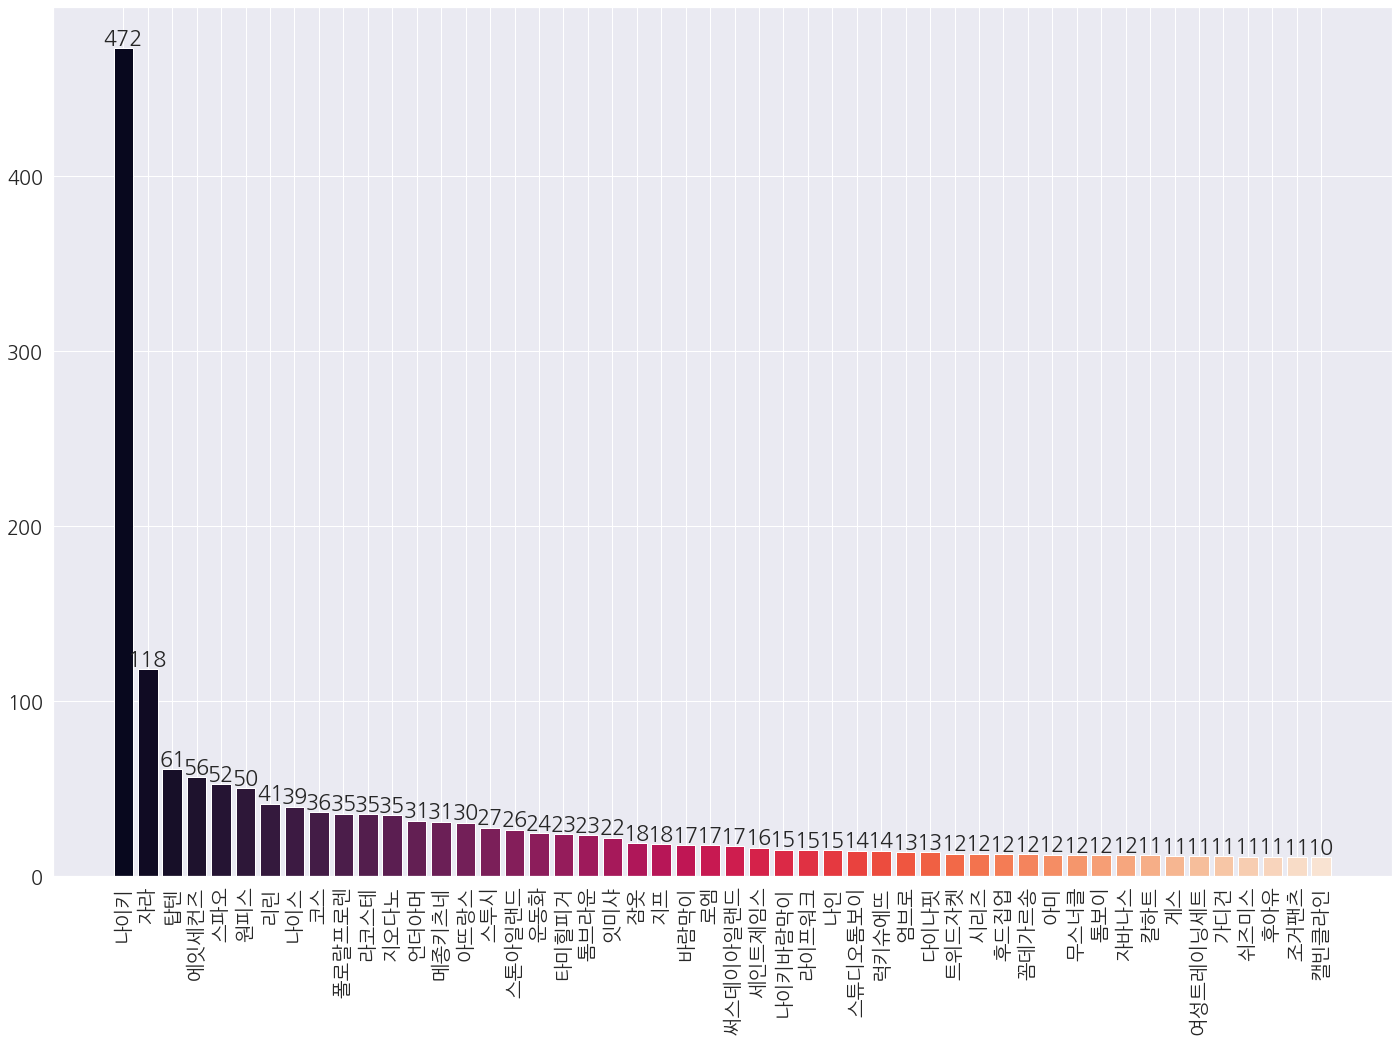

In [13]:
sns.set(style='darkgrid', font='NanumGothic', font_scale=1.8)
df1 = pd.DataFrame(df.mean().sort_values(ascending=False), columns=['검색량'])
df2 = df1.head(50) # 상위 50개 키워드만
f, ax = plt.subplots(figsize=(24, 16)); plt.xticks(rotation=90) 
plot = ax.bar(df2.index, df2['검색량'], color=sns.color_palette("rocket", len(df2.index)))
for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('C:/project/CODE/keyword/data/naver_top_500/' + yesterday + '_query_line_chart.png', bbox_inches='tight')

In [ ]:
import pandas as pd
import requests; from urllib.parse import urlparse
import seaborn as sns; sns.set(style='darkgrid', font='NanumGothic', font_scale=1.2)
import matplotlib.pyplot as plt
import squarify

import numpy as np
import datetime

import urllib.request
import json


In [1]:
df = pd.read_csv('C:/project/CODE/keyword/data/naver_top_500/trendykeywords/'+ yesterday + '_longterm_keywords_query.csv', encoding='UTF-8', index_col=0)
df['기간']= pd.to_datetime(df['기간'])
df

NameError: name 'pd' is not defined

In [ ]:
df['year'] = df['기간'].dt.year
df['month'] = df['기간'].dt.month
df['date'] = df['기간'].dt.date
df = df.set_index('기간')
df

In [ ]:
# 키워드 연평균 검색량
df.groupby(df.index.year).mean()

In [ ]:
# 전년대비 평균 검색량 변화율
df.groupby(df.index.year).mean().pct_change()

In [ ]:
# 키워드 연월 평균 검색량
df['year'] = df.index.year; df['month'] = df.index.month
df_ym = df.groupby([df.index.year, df.index.month]).mean()
df_ym

In [ ]:
df_ym.columns[:100]

In [ ]:
# 열지도 시각화
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_ym.pivot("month", "year", "자바나스반팔"), cmap="YlGnBu",
           annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('자바나스반팔 검색량')

In [ ]:
# '키워드1' vs '키워드2' 검색량 비교 열지도
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
sns.heatmap(df_ym.pivot("month", "year", "자바나스반팔"), cmap="YlGnBu",
           annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax1)
sns.heatmap(df_ym.pivot("month", "year", "반팔트위드자켓"), cmap="YlGnBu",
           annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax2)
ax1.set_title("자바나스반팔 검색량")
ax2.set_title("반팔트위드자켓 검색량")